# Global config

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

from cycler import cycler
from matplotlib import patches, ticker
import matplotlib.colors as mcolor
import textwrap

In [2]:
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [3]:
# Run this to close all figures*
plt.close("all")

In [4]:
## Global configuration

# constrained_layout automatically adjusts subplots and decorations like legends and colorbars
# so that they fit in the figure window while still preserving, as best they can, the logical
# layout requested by the user. constrained_layout is similar to tight_layout, but uses a constraint
# solver to determine the size of axes that allows them to fit.

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

# ['#3853a4', '#146533', '#ed1f24', '#708191', '#faa51a', '#b9519f']
# ['#F27970', '#BB9727',  '#54B345', '#32B897', '#05B9E2', '#8983BF']
palette = ['#EE6677', '#4477AA', '#8ECFC9', '#FFBE7A', '#BEB8DC', '#E7DAD2']
patterns = ["", "/" , "\\" , "x", ".", "o"] #  "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1, 1, 1)), (5, (10, 3))]
markers = ['v', '*', '.', 's', '1', 'x']

plt.rcParams["figure.constrained_layout.use"] = True

plt.rcParams['figure.figsize'] = [4.0, 3.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 18
plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'white'
plt.rcParams['legend.framealpha'] = 0.9
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['axes.prop_cycle'] = cycler(color=palette) + cycler(linestyle=linestyles)

In [5]:
transparency = 0.5

def get_transparent_color(color):
    c = mcolor.hex2color(color)
    c = tuple(map(lambda x: x*transparency + (1.0-transparency), mcolor.hex2color(c)))
    hex_color = '#{:02X}{:02X}{:02X}'.format(int(c[0] * 255), int(c[1] * 255), int(c[2] * 255))
    return hex_color

# `colors` for border lines and `colors_fill` for filled areas
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors_fill = list(map(get_transparent_color, colors))

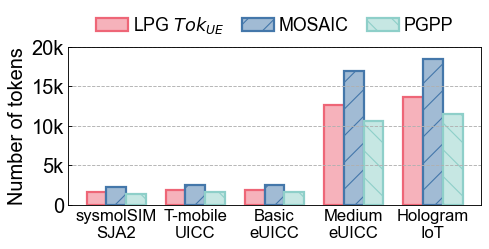

In [7]:
# This data is calculated based on token size and capacity of (e)SIM cards
df = pd.read_csv('data/tok_num.csv')

fig, ax = plt.subplots()
fig.set_size_inches((6, 3))

bar_width = 1
sys = ['LPG', 'MOSAIC', 'PGPP']
labels = ['LPG $Tok_{UE}$', 'MOSAIC', 'PGPP']

eSIM = [-30, -50, -70, -90, -110]

eSIM_labels = [textwrap.fill(label, width=10) for label in df["eSIM"]]


for i in range(len(sys)):
    x = i + np.arange(len(eSIM)) * 4
    y = df[sys[i]]
    
    bar_plot = ax.bar(x, y, width=bar_width, label=labels[i], edgecolor=colors[i], hatch=patterns[i], facecolor=colors_fill[i], linewidth=2)

ax.set_xticks( np.arange(5) * 4 + 1 )
ax.set_xticklabels(
    eSIM_labels,
    wrap=True,           
    fontsize=15,        
)
ax.set_yticks(np.arange(0, 25000, 5000))
ax.set_yticklabels([f"{int(y/1000)}k" if y else 0 for y in ax.get_yticks()]) 

ax.legend(bbox_to_anchor=(0.05, 1.1, 0.9, 0.15), loc='upper center', frameon=False,
          ncol=4, mode="expand", borderaxespad=0, handlelength=1.8, handletextpad=0.3, fontsize=16)

ax.set_ylabel("Number of tokens")
ax.tick_params(axis='x', length=0)


ax.grid(axis='y')

plt.savefig('tok_num.pdf')

LPG Token SNO generation time: 80.1
LPG Token UE generation time: 32.9


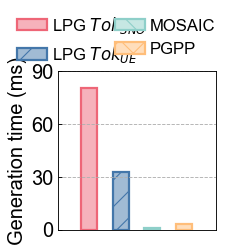

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches((3, 3))

bar_width = 1
sys = ['LPG $Tok_{SNO}$', 'LPG $Tok_{UE}$', 'MOSAIC', 'PGPP']

gen_times = []

### LPG Token SNO
lpg_token_sno_time = 0.0
with open("../Results/Satellite/at/anonymous_tokens/lpgtoksnogen_test/lpg-token-gen.log") as f:
    lines = f.readlines()
    for line in lines:
        if "LPGTokenSNOGen takes" in line:
            lpg_token_sno_time += float(line.split(" ")[3].strip())
print("LPG Token SNO generation time:", lpg_token_sno_time / 10)
gen_times.append(lpg_token_sno_time/10)

### LPG Token UE
lpg_token_ue_time = 0.0
with open("../Results/Phone/lpg-token-gen.log") as f:
    lines = f.readlines()
    for line in lines:
        if "LPGTokenUEGen takes" in line:
            lpg_token_ue_time += float(line.split(" ")[3].strip())
print("LPG Token UE generation time:", lpg_token_ue_time / 10)
gen_times.append(lpg_token_ue_time/10)

### MOSAIC
gen_times.append(1000/1175) # MOSAIC paper

### PGPP
with open("../Results/Phone/pgpp.log") as f:
    lines = f.readlines()
    lines = [line.split('[')[1].split(']')[0].split()[2:4] for line in lines if "time:   [" in line]
pgpp_time = 0.0
for line in lines:
    x, y = line
    x = float(x)
    if y == 'µs':
        x = x / 1000
    pgpp_time = pgpp_time + x
gen_times.append(pgpp_time)

for i,s in enumerate(sys):
    x = i*2
    y = gen_times[i]
    bar_plot = ax.bar(x, y, width=bar_width, label=sys[i], edgecolor=colors[i], hatch=patterns[i], facecolor=colors_fill[i], linewidth=2)


ax.set_xticks([])
ax.set_xlim(-2, 8)
ax.set_ylabel("Generation time (ms)")
ax.set_yticks([0,30,60,90])


ax.grid(axis='y')

ax.legend(bbox_to_anchor=(-0.3, 1.1, 1.34, 0.3), loc='upper center', frameon=False,
          ncol=2, mode="expand", borderaxespad=0, handlelength=1.8, handletextpad=0.3, fontsize=15)

plt.savefig('tok_gen_time.pdf')

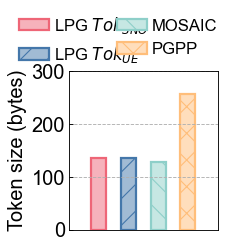

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches((3, 3))

bar_width = 1
sys = ['LPG $Tok_{SNO}$', 'LPG $Tok_{UE}$', 'MOSAIC', 'PGPP']

tok_sizes = []

### Size of LPG Token_{SNO} (see https://github.com/google/anonymous-tokens)
tok_sizes.append(136)
### Size of LPG Token_{UE}
tok_sizes.append(136)
### Size of MOSAIC token (data from MOSAIC paper)
tok_sizes.append(1024 // 8)
### PGPP
with open("../Results/Phone/pgpp.log") as f:
    lines = f.readlines()
    pgpp_tok_sizes = []
    for line in lines:
        if "Token size" in line:
            pgpp_tok_sizes.append(int(line.split()[-2]))
tok_sizes.append(np.mean(pgpp_tok_sizes))

for i,s in enumerate(sys):
    x = i*2
    y = tok_sizes[i]
    bar_plot = ax.bar(x, y, width=bar_width, label=sys[i], edgecolor=colors[i], hatch=patterns[i], facecolor=colors_fill[i], linewidth=2)

ax.set_xticks([])
ax.set_yticks([0,100,200,300])
ax.set_ylabel("Token size (bytes)")
ax.set_xlim(-2, 8)

ax.legend(bbox_to_anchor=(-0.38, 1.1, 1.42, 0.3), loc='upper center', frameon=False,
          ncol=2, mode="expand", borderaxespad=0, handlelength=1.8, handletextpad=0.3, fontsize=15)

ax.grid(axis='y')

plt.savefig('tok_size.pdf')

In [10]:
def get_cdf(lst):
    data = np.sort(np.array(lst))
    pdf = np.full((len(data), ), 1 / len(data) * 100) # sorted percentile
    cdf = np.cumsum(pdf)
    return data, cdf

def get_ccdf(lst):
    data = np.sort(np.array(lst))
    pdf = np.full((len(data), ), 1 / len(data))
    cdf = 1 - np.cumsum(pdf)
    return data, cdf

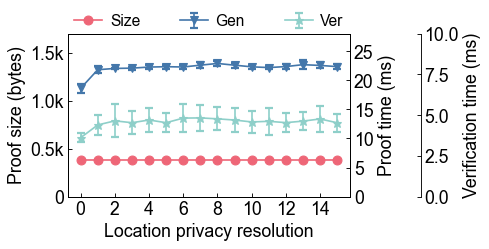

In [11]:
filename = '../Results/Phone/lpg-resolution.csv'
fontsize=16

fig, ax0 = plt.subplots()
fig.set_size_inches((6, 3))

df = pd.read_csv(filename, header=[0, 1], index_col=0, skiprows=[2])

ax0.errorbar(df.index, df[('Proof_Size', 'mean')] * 8, fmt='-o', capsize=4, capthick=2, ms=8, label='Size', color=colors[0])
ax0.set_ylabel('Proof size (bytes)', fontsize=fontsize)
ax0.set_ylim(0, 1700)
ax0.set_yticks(np.arange(0, 1700, 500))
ax0.set_yticklabels([f"{y/1000}k" if y else 0 for y in ax0.get_yticks()]) 
ax0.tick_params(axis='both', which='major', labelsize=fontsize)

ax1 = ax0.twinx()
ax1.errorbar(df.index, df[('Prover_Time', 'mean')] / 1000, yerr=df[('Prover_Time', 'std')] / 1000, fmt='-v', capsize=4, capthick=2, ms=8, label='Gen', color=colors[1])
ax1.set_ylabel('Proof time (ms)', fontsize=fontsize)
ax1.set_ylim(0, 28)
ax1.set_yticks(np.arange(0, 30, 5))
ax1.tick_params(axis='y', which='major', labelsize=fontsize)

ax2 = ax0.twinx()
ax2.spines['right'].set_position(('axes', 1.25))
ax2.errorbar(df.index, df[('Verifier_Time', 'mean')] / 1000, yerr=df[('Verifier_Time', 'std')] / 1000, fmt='-*', capsize=4, capthick=2, ms=8, label='Ver', color=colors[2])
ax2.set_ylabel('Verification time (ms)', fontsize=fontsize)
ax2.set_ylim(0, 10)
ax2.tick_params(axis='y', which='major', labelsize=fontsize)

ax0.set_xlabel('Location privacy resolution', fontsize=fontsize)
ax0.set_xticks(np.arange(0, 16, 2))

handles, labels = [], []
for ax in [ax0, ax1, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)


plt.legend(handles, labels, loc='upper center', mode="expand", frameon=False, bbox_to_anchor=(0, 1.05, 1, 0.11), ncol=3, borderaxespad=0, handlelength=1.8, handletextpad=0.5, columnspacing=0.5, fontsize=14)

plt.savefig('gran.pdf')

In [12]:
filenames = [
    '../Results/Satellite/at/anonymous_tokens/rsa_ssa_pss_verifier_test/test.log',
    '../Results/Satellite/at/anonymous_tokens/rsa_blind_signer_test/test.log'
]
LPG_NAME = 'LPGVerifierWorksWithPublicMetadata'
PGPP_NAME = 'PGPPorMOSAICSignerFails'
MOSAIC_NAME = 'PGPPorMOSAICSignerFails'

### In testing the app, we used googletest and we applied different parameter combinations.
### Now we only retain the data for the parameter combination used in the paper.
### That is, Modulus Bit Length ==2048, Public Metadata Set Size (|MD|)< 100
lpg_max_id = 4
pgpp_max_id = 2
mosaic_max_id = 2

counts = [0,0,0]
lpg_extra_times_sat = []
mosaic_extra_times_sat = []
pgpp_extra_times_sat = []
lpg_extra_times_earth = []
mosaic_extra_times_earth = []
pgpp_extra_times_earth = []

for filename in filenames:
    lines = open(filename).readlines()
    for line in lines:
        if len(line) < 3:
            continue
        s = line.strip()
        for i, name in enumerate([LPG_NAME, PGPP_NAME, MOSAIC_NAME]):
            if name in s:
                idx = int(s.split('/')[-1][0])
                if idx >= [lpg_max_id, pgpp_max_id, mosaic_max_id][i]:
                    continue
                counts[i] += 1
                [lpg_extra_times_sat, mosaic_extra_times_sat, pgpp_extra_times_sat][i].append(int(s.split(' ')[1]))
print("LPG extra times (sat):", lpg_extra_times_sat)
print("MOSAIC extra times (sat):", mosaic_extra_times_sat)
print("PGPP extra times (sat):", pgpp_extra_times_sat)

LPG extra times (sat): [142, 140, 143, 139, 143, 140, 143, 139, 143, 140, 142, 139, 142, 139, 143, 139, 143, 139, 143, 139, 143, 139, 143, 140, 142, 140, 143, 139]
MOSAIC extra times (sat): [15, 14, 14, 14, 28, 27, 29, 28, 28, 29, 28, 28, 29, 28, 28, 29, 29, 29, 28, 29]
PGPP extra times (sat): [15, 14, 14, 14, 28, 27, 29, 28, 28, 29, 28, 28, 29, 28, 28, 29, 29, 29, 28, 29]


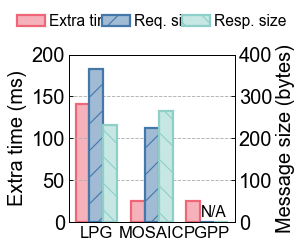

In [13]:
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
axes = [ax0, ax1, ax1]
fig.set_size_inches((4, 3))

bar_width = 1
metrics = ['Extra time', 'Req. size', 'Resp. size']

### For request sizes, we use the size of `ECIES.Enc(spk_u || LPG UE token || cell ID)` for LPG, 
### and `ECIES.Enc(spk_u || MOSAIC token || cell ID)` for MOSAIC.
### For response sizes, we use the size of `ECIES.Enc(LPG SNO token)` for LPG, 
### and `ECIES.Enc(MOSAIC token)` for MOSAIC.
### As MOSAIC paper does not mention specific public key encryption instantiation, 
### we assume they also used ECIES.
data = [
    [lpg_extra_times_sat, mosaic_extra_times_sat, pgpp_extra_times_sat],
    [[366], [225], [0]],
    [[233], [265], [0]]
]

lpg_us_extra_time = 0

sys = ['LPG', 'MOSAIC', 'PGPP']

for i,metric in enumerate(metrics):
    mean = [np.mean(subdata) for subdata in data[i]]

    for j,s in enumerate(sys):
        x = j*4 + i
        label = metrics[i] if j == 0 else None
        bar_plot = axes[i].bar(x, mean[j], width=bar_width, label=label, edgecolor=colors[i], hatch=patterns[i], facecolor=colors_fill[i], linewidth=2)

ax0.set_xticks(np.arange(3) * 4 + 1 )
ax0.set_xticklabels(
    sys,
    wrap=True,
    fontsize=15,
)
ax0.tick_params(axis='x', length=0)

ax0.set_ylim(0, 200)
ax1.set_ylim(0, 400)
ax0.set_yticks(np.arange(0, 250, 50))
ax1.set_yticks(np.arange(0, 500, 100))

ax0.set_ylabel("Extra time (ms)")
ax1.set_ylabel("Message size (bytes)")
ax0.set_xlim(-1, 11)

handles = []
labels = []
for ax in [ax0, ax1]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

plt.legend(handles, labels, bbox_to_anchor=(-0.35, 0.98, 1.7, 0.3), loc='upper center', frameon=False,
          ncol=3, mode="expand", borderaxespad=0, handlelength=1.8, handletextpad=0.3,fontsize=14)

ax0.grid(axis='y')

ax0.text(9.5, 6, 'N/A', horizontalalignment='center', fontsize=14)

plt.savefig('attach_bupt3_extra.pdf')

In [14]:
def parse_temp_power_log(filename, start_time_str, end_time_str):
    if "." in start_time_str:
        start_time = datetime.strptime(start_time_str, "%H:%M:%S.%f")
    else:
        start_time = datetime.strptime(start_time_str, "%H:%M:%S")
    if "." in end_time_str:
        end_time = datetime.strptime(end_time_str, "%H:%M:%S.%f")
    else:
        end_time = datetime.strptime(end_time_str, "%H:%M:%S")

    lines = open(filename).readlines()
    parsing_state = None
    core_temp = [[] for _ in range(8)]
    cpu_voltage = []
    cpu_current = []
    cpu_power = []
    total_voltage = []
    total_current = []
    total_power = []
    core_cnt = 0
    for line in lines:
        if line[0] == '[':
            time_str = line.split(']')[0][1:]
            if "." in time_str:
                time_record = datetime.strptime(time_str, "%H:%M:%S.%f")
            else:
                time_record = datetime.strptime(time_str, "%H:%M:%S")
            if time_record < start_time or time_record > end_time:
                continue
            record_type = line.split(' ')[-1].strip()
            if record_type == "power" and parsing_state == None:
                continue
            parsing_state = record_type
        elif line.split(' ')[0].strip() == "Address":
            core_temp[core_cnt % 8].append(float(line.split(' ')[-1].strip()))
            core_cnt += 1
        elif line[:11] == "CPU Voltage":
            cpu_voltage.append(float(line.split(' ')[-2].strip()))
        elif line[:11] == "CPU Current":
            cpu_current.append(float(line.split(' ')[-2].strip()))
        elif line[:9] == "CPU Power":
            cpu_power.append(float(line.split(' ')[-2].strip()))
        elif line[:13] == "Total Voltage":
            total_voltage.append(float(line.split(' ')[-2].strip()))
        elif line[:13] == "Total Current":
            total_current.append(float(line.split(' ')[-2].strip()))
        elif line[:11] == "Total Power":
            total_power.append(float(line.split(' ')[-2].strip())) 

    min_len = np.min([len(core_temp[i]) for i in range(8)] + [len(cpu_voltage), len(cpu_current), len(cpu_power), len(total_voltage), len(total_current), len(total_power)])

    for i in range(8):
        core_temp[i] = core_temp[i][:min_len]
    cpu_voltage = cpu_voltage[:min_len]
    cpu_current = cpu_current[:min_len]
    cpu_power = cpu_power[:min_len]
    total_voltage = total_voltage[:min_len]
    total_current = total_current[:min_len]
    total_power = total_power[:min_len]

    df = pd.DataFrame({
        'Core1_Temp': core_temp[0],
        'Core2_Temp': core_temp[1],
        'Core3_Temp': core_temp[2],
        'Core4_Temp': core_temp[3],
        'Core5_Temp': core_temp[4],
        'Core6_Temp': core_temp[5],
        'Core7_Temp': core_temp[6],
        'Core8_Temp': core_temp[7],
        'CPU_Voltage': cpu_voltage,
        'CPU_Current': cpu_current,
        'CPU_Power': cpu_power,
        'Total_Voltage': total_voltage,
        'Total_Current': total_current,
        'Total_Power': total_power
    })

    return df

In [15]:
from datetime import datetime
at_filename = "../Results/Satellite/at/arm-at-070424.log"
at_temp_power_filename="../Results/Satellite/at/070113.285-temp-power.log"

at_timestamps = []
lines = open(at_filename).readlines()
for line in lines:
    if len(line) > 2 and line[2] == ":":
        at_timestamps.append(line.split('top')[0].strip())
start_time_str=at_timestamps[0]
end_time_str=at_timestamps[-1]
at_df = parse_temp_power_log(at_temp_power_filename, start_time_str, end_time_str)

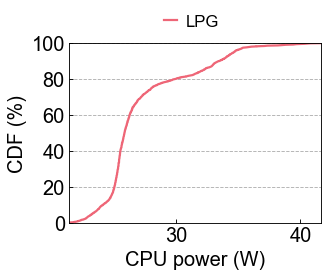

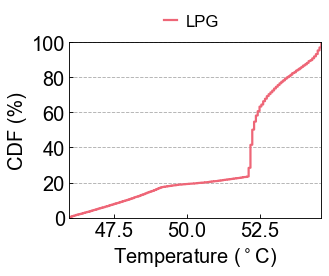

In [16]:
xstep = 20
ystep = 20

metrics = ['power', 'temp']
xlabels = ['CPU power (W)', 'Temperature ($^\circ$C)']
column_names = ['CPU_Power', 'Core1_Temp']

N = len(metrics)

for i,metric in enumerate(metrics):
    xline, cdf = get_cdf(at_df[column_names[i]].tolist())

    fig, ax = plt.subplots()
    fig.set_size_inches((4, 3))

    ax.plot(xline, cdf, label="LPG", linewidth=2)

    ax.set_xlim(np.min(at_df[column_names[i]].tolist()), np.max(at_df[column_names[i]].tolist()))
    ax.set_ylim(0, 100)
    ax.set_yticks(np.arange(0, 100 + ystep, ystep))
    ax.set_xlabel(xlabels[i])
    ax.set_ylabel('CDF (%)')

    ax.grid(True, axis='y')

    ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(0.35, 1.2),
            ncol=1, borderaxespad=0, handlelength=0.8, mode="expand",
            handletextpad=0.5, columnspacing=0, fontsize="small")

    plt.savefig(f"attach_bupt3_{metric}.pdf")

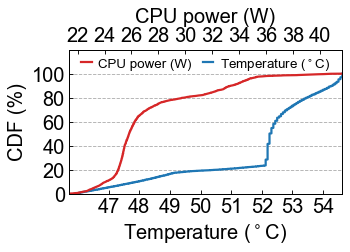

In [17]:
xstep = 20
ystep = 20
metrics = ['temp', 'power']
xlabels = ['Temperature ($^\circ$C)', 'CPU power (W)']
column_names = ['Core1_Temp', 'CPU_Power']
N = len(metrics)

plt.rcParams["figure.constrained_layout.use"] = False

fig, ax1 = plt.subplots()
fig.set_size_inches(4, 3)  
fig.subplots_adjust(top=0.83, bottom=0.23, right=0.98)

xline1, cdf1 = get_cdf(at_df[column_names[0]].tolist())
color1 = 'tab:blue'
ax1.plot(xline1, cdf1, color=color1, label=xlabels[0], linewidth=2)
ax1.set_xlabel(xlabels[0])
ax1.tick_params(axis='x')
ax1.set_ylabel('CDF (%)')
ax1.set_ylim(0, 120)
ax1.set_yticks(np.arange(0, 100 + ystep, ystep))
ax1.set_xticks(np.arange(47, 54 + 1, 1))
ax1.grid(True, axis='y')

ax2 = ax1.twiny()
xline2, cdf2 = get_cdf(at_df[column_names[1]].tolist())
color2 = 'tab:red'
ax2.plot(xline2, cdf2, color=color2, label=xlabels[1], linewidth=2)
ax2.set_xlabel(xlabels[1])
ax2.tick_params(axis='x')
ax2.set_xticks(np.arange(22, 40 + 2, 2))

ax1.set_xlim(45.7, np.max(xline1))
ax2.set_xlim(np.min(xline2), np.max(xline2))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper center', frameon=False, 
           bbox_to_anchor=(0.47, 1), borderaxespad=0, handlelength=0.8, mode="expand",
            handletextpad=0.5, columnspacing=0, fontsize=12, ncol=2)
plt.savefig("attach_bupt3_combined_metrics.pdf")
plt.show()
plt.rcParams["figure.constrained_layout.use"] = True

### LOCA temperature & power

In [18]:
import os
loca_df_full = None
for i in range(13):
    cur_dir = f"../Results/Satellite/loca{i}"
    subdirs = os.listdir(cur_dir)
    if 'run0' in subdirs:
        subdirs = [os.path.join(cur_dir, subdir) for subdir in subdirs]
    else:
        subdirs = [cur_dir]
    for subdir in subdirs:
        if '.DS_Store' in subdir:
            continue
        subsubdirs = os.listdir(subdir)
        for filename in subsubdirs:
            if 'temp-power' in filename:
                tp_filename = filename
        for filename in subsubdirs:
            
            if 'temp-power' not in filename:
                k = int(filename.split('-')[3])
                n = int(filename.split('-')[4])
                loca_timestamps = []
                lines = open(os.path.join(subdir, filename)).readlines()
                finished = False
                for line in lines:
                    if len(line) > 2 and line[2] == ":":
                        loca_timestamps.append(line.split(' ')[0].strip())
                    if "constraints" in line:
                        finished = True
                if not finished:
                    continue
                start_time_str=loca_timestamps[0]
                end_time_str=loca_timestamps[-1]
                loca_df = parse_temp_power_log(os.path.join(subdir, tp_filename), start_time_str, end_time_str)
                loca_df["kn"] = k*n
                # loca_df_dic[f"{k}-{n}"] = loca_df 
                if loca_df_full is None:
                    loca_df_full = loca_df
                else:
                    loca_df_full = pd.concat((loca_df_full, loca_df))

### LPG temperature and power

In [19]:
import os
pss_df_dic = {}
for i in range(7):
    cur_dir = f"../Results/Satellite/pss{i}"
    subdirs = os.listdir(cur_dir)
    if 'run0' in subdirs:
        subdirs = [os.path.join(cur_dir, subdir) for subdir in subdirs]
    else:
        subdirs = [cur_dir]
    for subdir in subdirs:
        subsubdirs = os.listdir(subdir)
        for filename in subsubdirs:
            if 'temp-power' in filename:
                tp_filename = filename
        for filename in subsubdirs:
            if 'temp-power' not in filename:
                k = int(filename.split('-')[3])
                n = int(filename.split('-')[5])
                ratio = int(filename.split('-')[4])
                pss_timestamps = []
                lines = open(os.path.join(subdir, filename)).readlines()
                for line in lines:
                    if len(line) > 2 and line[2] == ":":
                        # print(line.split(' ')[0].strip())
                        pss_timestamps.append(line.split(' ')[0].strip())
                
                start_time_str=pss_timestamps[0]
                end_time_str=pss_timestamps[-1]
                pss_df = parse_temp_power_log(os.path.join(subdir, tp_filename), start_time_str, end_time_str)
                pss_df["kn"] = k*n
                if ratio not in pss_df_dic:
                    pss_df_dic[ratio] = pss_df
                else:
                    pss_df_dic[ratio] = pd.concat((pss_df_dic[ratio], pss_df))

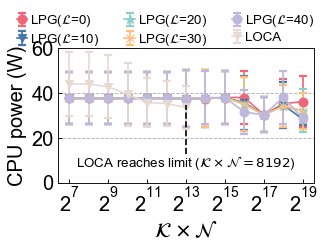

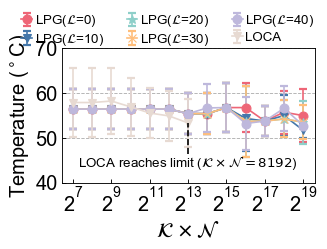

In [20]:
metrics = ['power', 'temp']
metric_names = ['CPU_Power', 'Core1_Temp']
ylabels = ['CPU power (W)', 'Temperature ($^\circ$C)']

methods = ['LPG0', 'LPG10', 'LPG20', 'LPG30', 'LPG40', 'LOCA']
legends = ['LPG($\\mathcal{L}$=0)', 'LPG($\\mathcal{L}$=10)', 'LPG($\\mathcal{L}$=20)', 'LPG($\\mathcal{L}$=30)', 'LPG($\\mathcal{L}$=40)', 'LOCA']

marker_types = ['o', 'v', '*', 'x', 'o', 'v']
data = [pss_df_dic[0], pss_df_dic[10], pss_df_dic[20], pss_df_dic[30], pss_df_dic[40], loca_df_full]

ylimits = [(0, 60), (40, 70)]

for i,metric in enumerate(metrics):
    fig, ax = plt.subplots()
    fig.set_size_inches((4, 3))
    for j, method in enumerate(methods):
        data_plot = data[j].groupby('kn').agg(
            mean=(metric_names[i], 'mean'),
            std=(metric_names[i], 'std')
        ).reset_index()

        ax.errorbar(data_plot['kn'], data_plot['mean'], yerr=data_plot['std'], fmt='-' + marker_types[j], capsize=4, capthick=2, ms=8, label=legends[j])
    

    ax.set_xlabel('$\\mathcal{K} \\times \\mathcal{N}$')
    ax.set_ylabel(ylabels[i])
    ax.set_ylim(*ylimits[i])
    ax.set_xscale('log', base=2)
    ax.set_xticks([2**x for x in range(7, 20, 2)])

    

    dotted_y = np.arange(
        ylimits[i][0] * 0.79 + ylimits[i][1] * 0.21, 
        loca_df_full[loca_df_full['kn'] == 8192][metric_names[i]].mean() * 0.95 + ylimits[i][1] * 0.05, 
        1
    )
    ax.plot([8192] * len(dotted_y), dotted_y, 
        color='black', linestyle='--', zorder=3)
    ax.text(8192, ylimits[i][0] * 0.88 + ylimits[i][1] * 0.12, 'LOCA reaches limit ($\\mathcal{K} \\times \\mathcal{N} = 8192$)', horizontalalignment='center', fontsize=12)


    ax.grid(axis='y')

    ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(-0.18, 1.05, 1.2, 0.25),
              ncol=6 / 2, borderaxespad=0, handlelength=0.8, mode="expand",
              handletextpad=0.2, columnspacing=1, labelspacing=0.2, fontsize=12)

    plt.savefig(f"settle_bupt3_{metric}.pdf")

### LOCA CPU util

In [21]:
from datetime import datetime
import os
loca_sno_latency_dic = {}
loca_sno_latency_dic_k_n = {}
loca_sno_cpu_dic = {}
for i in range(13):
    cur_dir = f"../Results/Satellite/loca{i}"
    subdirs = os.listdir(cur_dir)
    if 'run0' in subdirs:
        subdirs = [os.path.join(cur_dir, subdir) for subdir in subdirs]
    else:
        subdirs = [cur_dir]
    for subdir in subdirs:
        if 'DS_Store' in subdir:
            continue
        subsubdirs = os.listdir(subdir)
        for filename in subsubdirs:
            if 'temp-power' in filename:
                tp_filename = filename
        for filename in subsubdirs:
            if 'temp-power' not in filename:
                k = int(filename.split('-')[3])
                n = int(filename.split('-')[4])
                loca_timestamps = []
                lines = open(os.path.join(subdir, filename)).readlines()
                finished = False
                for line in lines:
                    if len(line) > 2 and line[2] == ":":
                        loca_timestamps.append(line.split(' ')[0].strip())
                        if len(line.split()) < 10:
                            continue            
                    if "constraints" in line:
                        finished = True
                if not finished:
                    continue
                for line in lines:
                    if len(line) > 2 and line[2] == ":":
                        if len(line.split()) < 10:
                            continue
                        cpu_util = float(line.split()[10].strip())
                        if k*n not in loca_sno_cpu_dic:
                            loca_sno_cpu_dic[k*n] = [cpu_util]
                        else:
                            loca_sno_cpu_dic[k*n].append(cpu_util)

                start_time_str=loca_timestamps[0]
                end_time_str=loca_timestamps[-1]

                if "." in start_time_str:
                    start_time = datetime.strptime(start_time_str, "%H:%M:%S.%f")
                else:
                    start_time = datetime.strptime(start_time_str, "%H:%M:%S")
                if "." in end_time_str:
                    end_time = datetime.strptime(end_time_str, "%H:%M:%S.%f")
                else:
                    end_time = datetime.strptime(end_time_str, "%H:%M:%S")

                latency = (end_time - start_time).total_seconds() * 1000
                if f"{k} {n}" not in loca_sno_latency_dic_k_n:
                    loca_sno_latency_dic_k_n[f"{k} {n}"] = [latency]
                else:
                    loca_sno_latency_dic_k_n[f"{k} {n}"].append(latency)
                if k*n not in loca_sno_latency_dic:
                    loca_sno_latency_dic[k*n] = [latency]
                else:
                    loca_sno_latency_dic[k*n].append(latency)

### LPG CPU util

In [22]:
from datetime import datetime
import os
lpg_sno_latency_dic = [{} for _ in range(5)]
lpg_sno_cpu_dic = [{} for _ in range(5)]
for i in range(7):
    cur_dir = f"../Results/Satellite/pss{i}"
    subdirs = os.listdir(cur_dir)
    if 'run0' in subdirs:
        subdirs = [os.path.join(cur_dir, subdir) for subdir in subdirs]
    else:
        subdirs = [cur_dir]
    for subdir in subdirs:
        subsubdirs = os.listdir(subdir)
        for filename in subsubdirs:
            if 'temp-power' in filename:
                tp_filename = filename
        for filename in subsubdirs:
            if 'temp-power' not in filename:
                k = int(filename.split('-')[3])
                n = int(filename.split('-')[5])
                ratio = int(filename.split('-')[4])
                lpg_timestamps = []
                lines = open(os.path.join(subdir, filename)).readlines()
                finished = False
                for line in lines:
                    if len(line) > 2 and line[2] == ":":
                        lpg_timestamps.append(line.split(' ')[0].strip())
                        if len(line.split()) < 10:
                            continue
                        cpu_util = float(line.split()[9].strip())

                        if k*n not in lpg_sno_cpu_dic[int(ratio / 10)]:
                            lpg_sno_cpu_dic[int(ratio / 10)][k*n] = [cpu_util]
                        else:
                            lpg_sno_cpu_dic[int(ratio / 10)][k*n].append(cpu_util)
                    if line[:11] == "Median opt.":
                        latency = float(line.split()[-1].strip()) / 1000 / 1000
                if k*n not in lpg_sno_latency_dic[int(ratio / 10)]:
                    lpg_sno_latency_dic[int(ratio / 10)][k*n] = [latency]
                else:
                    lpg_sno_latency_dic[int(ratio / 10)][k*n].append(latency)

### Plot cpu & sno latency

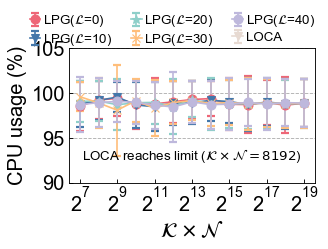

In [23]:
metrics = ['cpu']
ylabels = ['CPU usage (%)']

methods = ['LPG0', 'LPG10', 'LPG20', 'LPG30', 'LPG40', 'LOCA']
legends = ['LPG($\\mathcal{L}$=0)', 'LPG($\\mathcal{L}$=10)', 'LPG($\\mathcal{L}$=20)', 'LPG($\\mathcal{L}$=30)', 'LPG($\\mathcal{L}$=40)', 'LOCA']

marker_types = ['o', 'v', '*', 'x', 'o', 'v']

yscales = ['linear']

ylimits = [(91,104)]

data = [lpg_sno_cpu_dic + [loca_sno_cpu_dic]]

for i,metric in enumerate(metrics):
    fig, ax = plt.subplots()
    fig.set_size_inches((4, 3))
    for j, method in enumerate(methods):
        mean = []
        std = []
        
        for kn in sorted(data[i][j].keys()):
            mean.append(np.mean(data[i][j][kn]))
            std.append(np.std(data[i][j][kn]))

        ax.errorbar(sorted(data[i][j].keys()), mean, yerr=std, fmt='-' + marker_types[j], capsize=4, capthick=2, ms=8, label=legends[j])
    

    ax.set_xlabel('$\\mathcal{K} \\times \\mathcal{N}$')
    ax.set_ylabel(ylabels[i])
    ax.set_ylim(*ylimits[i])
    ax.set_xscale('log')
    ax.set_yscale(yscales[i])
    ax.set_xscale('log', base=2)
    ax.set_xticks([2**x for x in range(7, 20, 2)])
    ax.set_yticks([90,95,100,105])

    ax.grid(axis='y')

    ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(-0.18, 1.05, 1.2, 0.25),
              ncol=6 / 2, borderaxespad=0, handlelength=0.8, mode="expand",
              handletextpad=0.2, columnspacing=1, labelspacing=0.2, fontsize=12)

    dotted_y = np.arange(
        ylimits[i][0] * 0.79 + ylimits[i][1] * 0.21, 
        np.mean(data[0][-1][8192]) * 0.93 + ylimits[i][1] * 0.07,
        1
    )
    ax.plot([8192] * len(dotted_y), dotted_y, 
        color='black', linestyle='--', zorder=3)
    ax.text(8192, ylimits[i][0] * 0.88 + ylimits[i][1] * 0.12, 'LOCA reaches limit ($\\mathcal{K} \\times \\mathcal{N} = 8192$)', horizontalalignment='center', fontsize=12)

    plt.savefig(f"settle_bupt3_{metric}.pdf")


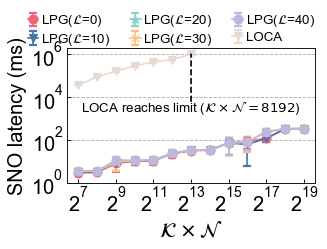

In [24]:
metrics = ['sno_latency']
ylabels = ['SNO latency (ms)']

methods = ['LPG0', 'LPG10', 'LPG20', 'LPG30', 'LPG40', 'LOCA']
legends = ['LPG($\\mathcal{L}$=0)', 'LPG($\\mathcal{L}$=10)', 'LPG($\\mathcal{L}$=20)', 'LPG($\\mathcal{L}$=30)', 'LPG($\\mathcal{L}$=40)', 'LOCA']

marker_types = ['o', 'v', '*', 'x', 'o', 'v']

yscales = ['log']

ylimits = [(1,10**6.3)]

data = [lpg_sno_latency_dic + [loca_sno_latency_dic]]

for i,metric in enumerate(metrics):
    fig, ax = plt.subplots()
    fig.set_size_inches((4, 3))
    for j, method in enumerate(methods):
        mean = []
        std = []
        for kn in sorted(data[i][j].keys()):
            mean.append(np.mean(data[i][j][kn]))
            std.append(np.std(data[i][j][kn]))

        ax.errorbar(sorted(data[i][j].keys()), mean, yerr=std, fmt='-' + marker_types[j], capsize=4, capthick=2, ms=8, label=legends[j])
    

    ax.set_xlabel('$\\mathcal{K} \\times \\mathcal{N}$')
    ax.set_ylabel(ylabels[i])
    ax.set_ylim(*ylimits[i])
    ax.set_xscale('log')
    ax.set_yscale(yscales[i])
    ax.set_yticks([1e0, 1e2, 1e4, 1e6])
    ax.set_xscale('log', base=2)
    ax.set_xticks([2**x for x in range(7, 20, 2)])

    ax.grid(axis='y')

    dotted_y = np.arange(
        ylimits[i][0] * 0.997 + ylimits[i][1] * 0.003, 
        np.mean(data[0][-1][8192]) * 0.93 + ylimits[i][1] * 0.07,
        1
    )
    ax.plot([8192] * len(dotted_y), dotted_y, 
        color='black', linestyle='--', zorder=3)
    ax.text(8192, ylimits[i][0] * 0.999 + ylimits[i][1] * 0.001, 'LOCA reaches limit ($\\mathcal{K} \\times \\mathcal{N} = 8192$)', horizontalalignment='center', fontsize=12)


    ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(-0.18, 1.05, 1.2, 0.25),
              ncol=6 / 2, borderaxespad=0, handlelength=0.8, mode="expand",
              handletextpad=0.2, columnspacing=1, labelspacing=0.2, fontsize=12)

    plt.savefig(f"settle_bupt3_{metric}.pdf")


In [25]:
import os
import pandas as pd

def time_str_to_float(time_str):
    assert time_str[-2:] == "ms" or time_str[-1:] == "s"
    if time_str[-2:] == "ms":
        return float(time_str[:-2])
    elif time_str[-1:] == "s":
        return float(time_str[:-1]) * 1000

log_dir = '../Results/SCAC'
files = os.listdir(log_dir)
filepaths = [os.path.join(log_dir, file) for file in files]
data = []

for filepath in filepaths:
    N = int(filepath.split('_')[2][1:])
    K = int(filepath.split('_')[3][1:])
    lpg_num_constraints = -1
    loca_num_constraints = -1
    constraint_generation_time = -1
    polynomial_commitment_time = -1
    matching_sumcheck_time = -1
    distributed_sumcheck_time = -1
    opening_phase_time = -1

    lines = open(filepath).readlines()
    for line in lines:
        
        if "Created SCAC circuit: " in line:
            loca_num_constraints = int(line.split()[7].split('=')[-1].strip(','))
            lpg_num_constraints = int(line.split()[9].split('=')[-1])
        if "End:     Constraint Generation" in line:
            constraint_generation_time = time_str_to_float(line.split()[-1])
        if "End:     Polynomial Commitment" in line:
            polynomial_commitment_time = time_str_to_float(line.split()[-1])
        if "End:     Matching Sumcheck" in line:
            matching_sumcheck_time = time_str_to_float(line.split()[-1])
        if "End:     Distributed Sumcheck" in line:
            distributed_sumcheck_time = time_str_to_float(line.split()[-1])
        if "End:     Opening Phase" in line:
            opening_phase_time = time_str_to_float(line.split()[-1])

    if K >= 128:
        continue

    data.append({
        'N': N,
        'K': K,
        'loca_num_constraints': loca_num_constraints,
        'lpg_num_constraints': lpg_num_constraints,
        'constraint_generation_time': constraint_generation_time,
        'polynomial_commitment_time': polynomial_commitment_time,
        'matching_sumcheck_time': matching_sumcheck_time,
        'distributed_sumcheck_time': distributed_sumcheck_time,
        'opening_phase_time': opening_phase_time
    })

df = pd.DataFrame(data)
df = df.sort_values(by=['N', 'K'], ascending=[True, True])
df = df.reset_index(drop=True)
df["lpg_time"] = df["constraint_generation_time"] + df["polynomial_commitment_time"] + df["matching_sumcheck_time"] + df["distributed_sumcheck_time"]

In [26]:
unfinished_set = []
finished_set = []
n_k_locatimes = []
for i in range(13):
    cur_dir = f"../Results/Satellite/loca{i}"
    subdirs = os.listdir(cur_dir)
    if 'run0' in subdirs:
        subdirs = [os.path.join(cur_dir, subdir) for subdir in subdirs]
    else:
        subdirs = [cur_dir]
    for subdir in subdirs:
        if '.DS_Store' in subdir:
            continue
        subsubdirs = os.listdir(subdir)
        for filename in subsubdirs:
            if 'temp-power' in filename:
                tp_filename = filename
        for filename in subsubdirs:
            if 'temp-power' not in filename:
                n = int(filename.split('-')[3])
                k = int(filename.split('-')[4])
                loca_timestamps = []
                lines = open(os.path.join(subdir, filename)).readlines()
                finished = False
                for line in lines:
                    if len(line) > 2 and line[2] == ":":
                        loca_timestamps.append(' '.join(line.split(' ')[:2]).strip())
                        if len(line.split()) < 10:
                            continue            
                    if "constraints" in line:
                        finished = True
                if finished:
                    finished_set.append((n,k))
                else:
                    unfinished_set.append((n,k))
print("unfinished_set", unfinished_set)
print("finished_set", finished_set)
loca_times = [[int(k.split()[0]), int(k.split()[1]), v[0]] for k,v in loca_sno_latency_dic_k_n.items()]
loca_times_df = pd.DataFrame(loca_times, columns=['N', 'K', 'loca_time'])
df = df.merge(loca_times_df, on=['N', 'K'], how='left')
mask_loca_no = df.apply(lambda row: (row['N'], row['K']) in unfinished_set or row['N'] * row['K'] > 8192, axis=1)
df_reverse = df.copy()
df.loc[mask_loca_no, 'loca_num_constraints'] = np.nan
# df.loc[mask_loca_no, "time"] = np.nan
df_reverse.loc[~mask_loca_no, 'loca_num_constraints'] = np.nan
# df_reverse.loc[~mask_loca_no, 'loca_time'] = np.nan


mask_all_no = df.apply(lambda row: row['N'] > 150 * row['K'], axis=1)
df.loc[mask_all_no, 'loca_num_constraints'] = np.nan
df.loc[mask_all_no, 'lpg_num_constraints'] = np.nan
df.loc[mask_all_no, 'loca_time'] = np.nan
df.loc[mask_all_no, 'lpg_time'] = np.nan

df_reverse.loc[df['lpg_num_constraints'].isna(), 'lpg_num_constraints'] = np.nan

unfinished_set [(512, 32), (512, 64), (512, 128), (1024, 16), (1024, 32), (1024, 64), (2048, 16), (2048, 32)]
finished_set [(256, 4), (256, 8), (128, 16), (256, 2), (128, 2), (128, 4), (128, 1), (128, 1), (128, 8), (512, 8), (512, 4), (256, 16), (512, 16), (1024, 8), (256, 32)]


[64] [2, 4, 8, 16, 32, 64]
[64] [4, 8, 16, 32, 64]
[64] [8, 16, 32, 64]
[32] [64]
[16] [32, 64]
[8] [16, 32, 64]


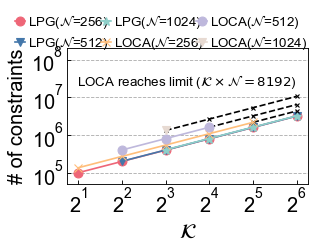

In [27]:
metrics = ['num_constraints']
ylabels = ['# of constraints']

methods = ['lpg', 'lpg', 'lpg', 'loca', 'loca', 'loca']
ns = [256, 512, 1024, 256, 512, 1024]
legends = [methods[i].upper()+'($\\mathcal{N}$='+str(ns[i])+')' for i in range(6)]

marker_types = ['o', 'v', '*', 'x', 'o', 'v']

yscales = [['log']]
xscales = [['log']]

ylimits = [(5*1e4,2*1e8)]

for i,metric in enumerate(metrics):
    fig, ax = plt.subplots()
    fig.set_size_inches((4, 3))
    for j, method in enumerate(methods):
        n = ns[j]
        print(df[df['N'] == n].dropna(subset=[f"{method}_num_constraints"])['K'].to_list()[-1:], df_reverse[df_reverse['N'] == n].dropna(subset=[f"{method}_num_constraints"])['K'].to_list())
        if method == 'loca':
            ax.errorbar(
                df[df['N'] == n].dropna(subset=[f"{method}_num_constraints"])['K'].to_list()[-1:] + df_reverse[df_reverse['N'] == n].dropna(subset=[f"{method}_num_constraints"])['K'].to_list(), 
                df[df['N'] == n].dropna(subset=[f"{method}_num_constraints"])[f"{method}_num_constraints"].to_list()[-1:] + df_reverse[df['N'] == n].dropna(subset=[f"{method}_num_constraints"])[f"{method}_num_constraints"].to_list(),
                fmt='--x', capsize=4, capthick=2, ms=3, color="black"
            )
        ax.errorbar(
            df[df['N'] == n]['K'], df[df['N'] == n][f"{method}_num_constraints"], 
            fmt='-' + marker_types[j], capsize=4, capthick=2, ms=8, label=legends[j]
        )
        
    ax.set_xlabel('$\\mathcal{K}$')
    ax.set_ylabel(ylabels[i])
    pos = ax.yaxis.get_label().get_position()
    ax.set_ylim(*ylimits[i])
    ax.set_xscale('log', base=2)
    ax.set_xticks([2**i for i in range(1, 7)])
    ax.set_yscale(*yscales[i])
    ax.set_yticks([1e5,1e6,1e7,1e8])
    ax.grid(axis='y')
    ax.text(11.3, ylimits[i][0] * 0.9 + ylimits[i][1] * 0.1, 'LOCA reaches limit ($\\mathcal{K} \\times \\mathcal{N} = 8192$)', horizontalalignment='center', fontsize=12)

    ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(-0.24, 1.05, 1.26, 0.25),
              ncol=6 / 2, borderaxespad=0, handlelength=0.8, mode="expand",
              handletextpad=0.2, columnspacing=1, labelspacing=0.2, fontsize=12)

    plt.savefig(f"settle_bupt3_{metric}.pdf")

[64] [1, 2, 4, 8, 16, 32, 64]
[7041.886] [242.14, 367.931, 652.34, 1126.289, 1586.464, 3143.909, 7041.886]
[64] [1, 2, 4, 8, 16, 32, 64]
[7531.0599999999995] [363.72799999999995, 458.775, 659.5999999999999, 1297.005, 969.142, 1905.257, 7531.0599999999995]
[64] [1, 2, 4, 8, 16, 32, 64]
[8002.52] [573.723, 652.118, 813.8589999999999, 1453.33, 1189.586, 2538.075, 8002.52]
[64] [1, 2, 4, 8, 16, 32, 64]
[nan] [nan, 145000.0, 262000.0, 483000.0, 560000.0, 1088000.0, nan]
[64] [1, 2, 4, 8, 16, 32, 64]
[nan] [nan, nan, 362000.0, 571000.0, 1090000.0, nan, nan]
[64] [1, 2, 4, 8, 16, 32, 64]
[nan] [nan, nan, nan, 892000.0, nan, nan, nan]


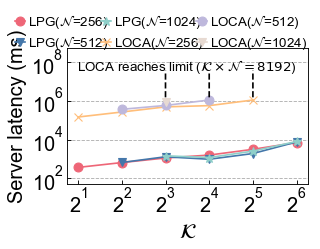

In [28]:
metrics = ['xxx_latency']
ylabels = ['Server latency (ms)']

methods = ['lpg', 'lpg', 'lpg', 'loca', 'loca', 'loca']
ns = [256, 512, 1024, 256, 512, 1024]
legends = [methods[i].upper()+'($\\mathcal{N}$='+str(ns[i])+')' for i in range(6)]

marker_types = ['o', 'v', '*', 'x', 'o', 'v']

yscales = ['log']
xscales = ['log']

ylimits = [(5*1e1,5*1e8)]

for i,metric in enumerate(metrics):
    fig, ax = plt.subplots()
    fig.set_size_inches((4, 3))
    for j, method in enumerate(methods):
        n = ns[j]
        print(df[df['N'] == n]['K'].to_list()[-1:], df_reverse[df_reverse['N'] == n]['K'].to_list())
        print(df[df['N'] == n][f"{method}_time"].to_list()[-1:], df_reverse[df['N'] == n][f"{method}_time"].to_list())

        ax.errorbar(
            df[df['N'] == n]['K'], df[df['N'] == n][f"{method}_time"], 
            fmt='-' + marker_types[j], capsize=4, capthick=2, ms=8, label=legends[j]
        )
        
    ax.set_xlabel('$\\mathcal{K}$')
    ax.set_ylabel(ylabels[i])
    ax.set_ylim(*ylimits[i])
    ax.set_xscale('log', base=2)
    ax.set_yscale(yscales[i])
    ax.set_yticks([1e2,1e4,1e6,1e8])
    ax.set_xticks([2**i for i in range(1, 7)])

    ax.grid(axis='y')

    dotted_y = np.arange(
        ylimits[i][0] * 0.997 + ylimits[i][1] * 0.003, 
        df[df['N'] == 1024][f"loca_time"].iloc[3] * 0.93 + ylimits[i][1] * 0.07,
        1
    )
    ax.plot([8] * len(dotted_y), dotted_y, 
        color='black', linestyle='--', zorder=3)
    dotted_y = np.arange(
        ylimits[i][0] * 0.997 + ylimits[i][1] * 0.003, 
        df[df['N'] == 512][f"loca_time"].iloc[4] * 0.93 + ylimits[i][1] * 0.07,
        1
    )
    ax.plot([16] * len(dotted_y), dotted_y, 
        color='black', linestyle='--', zorder=3)
    dotted_y = np.arange(
        ylimits[i][0] * 0.997 + ylimits[i][1] * 0.003, 
        df[df['N'] == 256][f"loca_time"].iloc[5] * 0.93 + ylimits[i][1] * 0.07,
        1
    )
    ax.plot([32] * len(dotted_y), dotted_y, 
        color='black', linestyle='--', zorder=3)
    ax.text(11.3, ylimits[i][0] * 0.93 + ylimits[i][1] * 0.07, 'LOCA reaches limit ($\\mathcal{K} \\times \\mathcal{N} = 8192$)', horizontalalignment='center', fontsize=12)

    ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(-0.24, 1.05, 1.26, 0.25),
              ncol=6 / 2, borderaxespad=0, handlelength=0.8, mode="expand",
              handletextpad=0.2, columnspacing=1, labelspacing=0.2, fontsize=12)

    plt.savefig(f"settle_bupt3_{metric}.pdf")